## Лабораторная работа 3 (2 часть)
## Решение уравнений параболического типа
## (2D уравнение теплопроводности)
Выполнил: Гапанович А. В. (4 группа)

Для решения дана следующая задача:
$$\frac{\partial U}{\partial t}=\alpha(\frac{\partial ^{2}U}{\partial x^{2}}+\frac{\partial ^{2}U}{\partial y^{2}})$$
$$
0\leqslant x \leqslant L_{1},\; 0\leqslant y \leqslant L_{2}, \;t\geqslant 0 $$

С условиями:
$$U(x,y,0) = sin(\pi x) \cdot sin(\pi y)$$
$$U(0,y,t) = 0, \; U(L_{1},y,t) = 0$$
$$U(x,0,t) = 0, \; U(x,L_{2},t) = 0$$

Цель:
*   явная двухслойная схема (FTCS метод)
*   метод продольно-поперечных прогонок


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [168]:
alph = 1
l_x, l_y = 1, 1
N_x, N_y = 10, 10

time_sum = 1
time_1 = 0.01
time_2 = 0.05
time_3 = 0.1
time_4 = 0.25

d_1 = 0.1
d_2 = 0.5
d_3 = 0.6
d_4 = 2.5

In [169]:
def border_left_x(y, t):
    return 0
def border_right_x(y, t):
    return 0
def border_left_y(x, t):
    return 0
def border_right_y(x, t):
    return 0
def fun_initial(x, y):
    return math.sin(math.pi * x) * math.sin(math.pi * y)

In [206]:
def explicit_schem(d):
    step_x = l_x / N_x
    step_y = l_y / N_y
    step_time = step_x**2 * d / alph*2
    N_t = int(time_sum / dt)
    print("Диффузионное число = ", d)
    u = np.zeros((N_t + 1, columns_x + 1, columns_y + 1))
    
    for i in range(1, N_x):
        for j in range(1, N_y):
            u[0][i][j] = fun_initial(i * step_x, j * step_y)
    
    for i in range(N_t + 1):
        for j in range(N_y + 1):
            u[i][0][j] = border_left_y(j * step_y, i * step_time)
            u[i][N_x][j] = border_right_y(j * step_y, i * step_time)
            
    for i in range(N_t + 1):    
        for j in range(N_x + 1):
            u[i][j][0] = border_left_x(j * step_x, i * step_time)
            u[i][j][N_y] = border_right_x(j * step_x, i * step_time)
            
    for i in range(N_t):
        for j in range(1, N_x):
            for k in range(1, N_y):
                u[i+1][j][k]=(d*(u[i][j+1][k]-2*u[i][j][k]+u[i][j-1][k])
                              + d * (u[i][j][k+1]-2*u[i][j][k]+u[i][j][k-1])
                              + u[i][j][k])
    return u, step_time

In [207]:
def draw(step_t, u: list, time):
    print("Время = ", time)
    a, b, c = np.shape(u)
    x = np.linspace(0, length_x, b)
    y = np.linspace(0, length_y, c)
    X, Y = np.meshgrid(x, y)
    fig= plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_zlim(0, 0.5)
    surf = ax.plot_surface(X, Y, u[int(time / step_t), :], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

Диффузионное число =  0.1
Время =  0.01


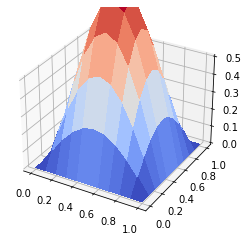

In [208]:
u, dt = explicit_schem(d_1)
draw(dt, u, time_1)

Диффузионное число =  0.1
Время =  0.05


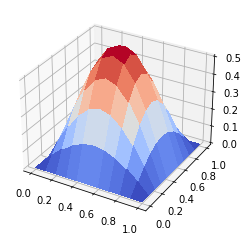

In [209]:
u, dt = explicit_schem(d_1)
draw(dt, u, time_2)

Диффузионное число =  0.1
Время =  0.1


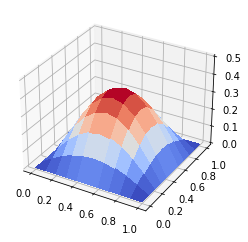

In [210]:
u, dt = explicit_schem(d_1)
draw(dt, u, time_3)

Диффузионное число =  0.1
Время =  0.25


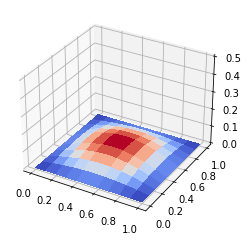

In [211]:
u, dt = explicit_schem(d_1)
draw(dt, u, time_4)

Диффузионное число =  0.5
Время =  0.01


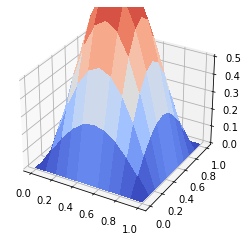

In [212]:
u, dt = explicit_schem(d_2)
draw(dt, u, time_1)

Диффузионное число =  0.5
Время =  0.05


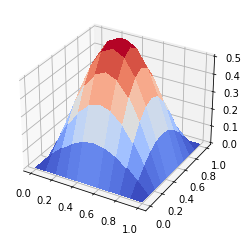

In [213]:
u, dt = explicit_schem(d_2)
draw(dt, u, time_2)

Диффузионное число =  0.5
Время =  0.1


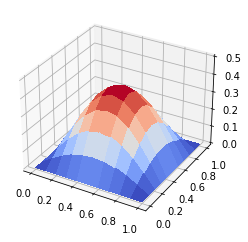

In [214]:
u, dt = explicit_schem(d_2)
draw(dt, u, time_3)

Диффузионное число =  0.5
Время =  0.25


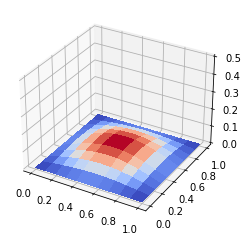

In [215]:
u, dt = explicit_schem(d_2)
draw(dt, u, time_4)

Диффузионное число =  0.6
Время =  0.01


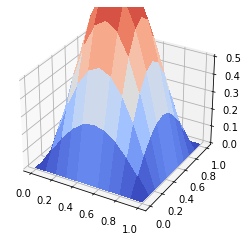

In [216]:
u, dt = explicit_schem(d_3)
draw(dt, u, time_1)

Диффузионное число =  0.6
Время =  0.05


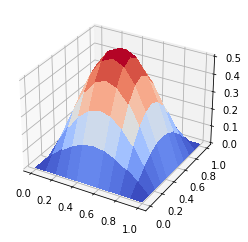

In [217]:
u, dt = explicit_schem(d_3)
draw(dt, u, time_2)

Диффузионное число =  0.6
Время =  0.1


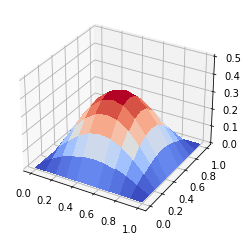

In [218]:
u, dt = explicit_schem(d_3)
draw(dt, u, time_3)

Диффузионное число =  0.6
Время =  0.25


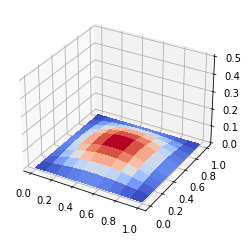

In [219]:
u, dt = explicit_schem(d_3)
draw(dt, u, time_4)

Диффузионное число =  2.5
Время =  0.01


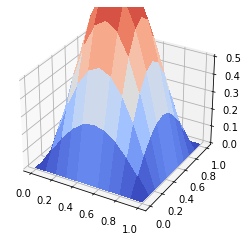

In [220]:
u, dt = explicit_schem(d_4)
draw(dt, u, time_1)

Диффузионное число =  2.5
Время =  0.05


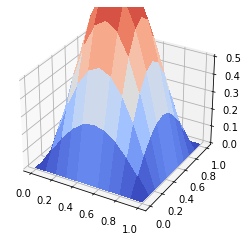

In [221]:
u, dt = explicit_schem(d_4)
draw(dt, u, time_2)

Диффузионное число =  2.5
Время =  0.1


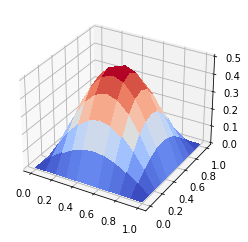

In [222]:
u, dt = explicit_schem(d_4)
draw(dt, u, time_3)

Диффузионное число =  2.5
Время =  0.25


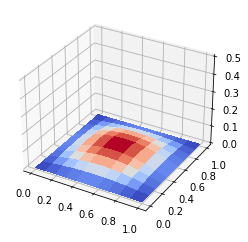

In [223]:
u, dt = explicit_schem(d_4)
draw(dt, u, time_4)